In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mean = np.array([2, 10])
cov = [[1., 1.8], [1.8, 1.5]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


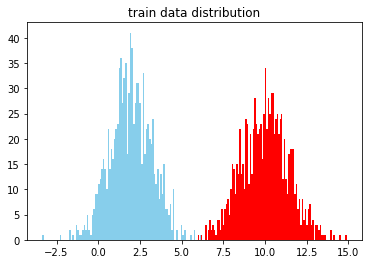

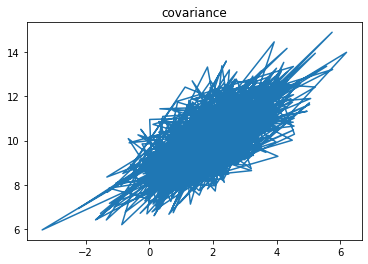

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


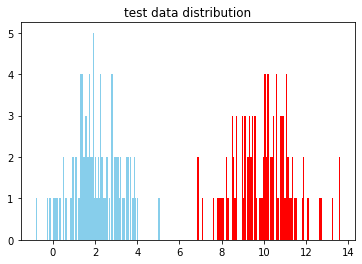

In [46]:
n_train = 1000

class_0, class_1 = np.random.multivariate_normal(mean, cov, n_train).T

plt.hist(class_0, color = "skyblue", bins = 100)
plt.hist(class_1, color = "red", bins = 100)
plt.title("train data distribution")
plt.show()

plt.plot(class_0, class_1)
plt.title("covariance")
plt.show()

n_test = 100

test_0, test_1 = np.random.multivariate_normal(mean, cov, n_test).T
plt.hist(test_0, color = "skyblue", bins = 100)
plt.hist(test_1, color = "red", bins = 100)
plt.title("test data distribution")
plt.show()

In [4]:
print(class_0.shape)
print(type(class_0))

(1000,)
<class 'numpy.ndarray'>


In [5]:
def generate_input(class_0, class_1):
  x = np.concatenate((class_0, class_1), axis = 0).reshape(len(class_0) + len(class_1), 1)
  y = np.concatenate((np.zeros(len(class_0)), np.ones(len(class_1))), axis= 0).reshape(len(class_0) + len(class_1), 1)
  return x, y

x, y = generate_input(class_0, class_1)  

print(x.shape)
print(y.shape)

(2000, 1)
(2000, 1)


In [6]:
print(y.shape)
#print(test_y)

(2000, 1)


In [7]:
class LogisticRegression:
  def __init__(self, train_data, label_data, lr = 1e-2, delta = 1e-7, max_iter = 10000, cost_threshold = 1e-2, class_threshold = 0.5, verbose = True):
    self.x_data = train_data
    self.y_data = label_data
    self.lr = lr
    self.max_iter = max_iter
    self.delta = delta
    self.cost_threshold = cost_threshold
    self.class_threshold = class_threshold
    self.verbose = verbose
  
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def loss_func(self, h, y): 
    # !log(0)
    return - np.sum(y * np.log(h + self.delta) + (1 - y)*np.log((1-h) + self.delta))

  def train(self):

    self.w = np.random.rand(1,1)
    self.b = np.random.rand(1)

    for i in range(self.max_iter):

      w_list.extend(self.w[0])
      

      z = np.dot(self.x_data, self.w) + self.b # (100,)
      h = self.sigmoid(z) # predicted possibility of x, (10,)
      
      diff = h - self.y_data #(100, 100)

      cost = self.loss_func(h, self.y_data)

      gradient = np.dot(self.x_data.transpose(), diff) #(1, 100)

      self.w -= self.lr * gradient / self.x_data.shape[0]
      self.b -= self.lr * np.mean(diff) / self.x_data.shape[0]


      if cost < self.cost_threshold:
        return False

      if (self.verbose == True and i %10000 == 0):
        print('cost of {} iteration: {}'.format(i, cost))
        #print(w_list)

    


  def predict(self, x):
    z = np.dot(x, self.w) + self.b
    h = self.sigmoid(z) # predicted possibility of x, confidence

    h_class = 1 if h > self.class_threshold else 0


    return h, h_class


  def getwb(self):
    return self.w, self.b

cost of 0 iteration: 2354.2227776255622
cost of 10000 iteration: 1217.2313787725811
cost of 20000 iteration: 1038.9410012208423
cost of 30000 iteration: 896.8311861648265
cost of 40000 iteration: 783.6252192225318
cost of 50000 iteration: 692.9097311427827
cost of 60000 iteration: 619.5071518640632
cost of 70000 iteration: 559.4262506241355
cost of 80000 iteration: 509.6556349986468
cost of 90000 iteration: 467.938551169398


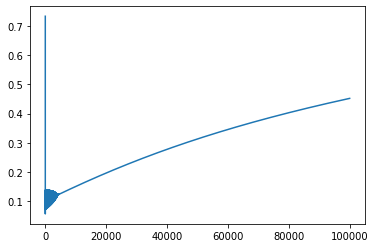

[0.7338608476213371, 0.45702651480137607, 0.20403918824062506, 0.055673235824776596, 0.16111656252009932, 0.06035938698416647, 0.15330755474435626, 0.06306707686349115, 0.1489607186187793, 0.06485959659893903]
[[0.27355447]] 0
[[0.85013198]] 1


In [8]:
if __name__ == "__main__":
  
  n_iter = 100000
  LR = LogisticRegression(train_data = x, label_data = y, lr = 0.3, max_iter = n_iter)

  w_list = []
 
  LR.train()

  # plot w
  y = np.arange(n_iter)  
  plt.plot(y, w_list)
  plt.show()

  print(w_list[:10])

  (predicted_prob, predicted_class) = LR.predict(2)
  print(predicted_prob, predicted_class)

  (predicted_prob, predicted_class) = LR.predict(8)
  print(predicted_prob, predicted_class)

In [9]:
(w, b) = LR.getwb()
print(w, b)

[[0.45204988]] [-1.88076247]


In [10]:
# performance 
import sklearn.metrics as metrics
import pandas as pd

test_x, test_y = generate_input(test_0, test_1)  
test = list(zip(test_x, test_y))

test_y = test_y.reshape(test_y.shape[0],).astype(int)
y_conf = pd.DataFrame({"test_y": test_y.tolist()})

predicted_y = np.array([])

for idx, (val, label) in enumerate(test):
  (predicted_prob, predicted_class) = LR.predict(val)
  predicted_y = np.append(predicted_y, predicted_class)
  
  y_conf.loc[idx, 'confidence'] = predicted_prob
  y_conf.loc[idx, 'predicted_class'] = predicted_class

print(y_conf.head())

y_conf = y_conf.sort_values(by = ['confidence'], ascending = False)
print('\nSorted')
print(y_conf.head())


   test_y  confidence  predicted_class
0       0    0.228254              0.0
1       0    0.350786              0.0
2       0    0.300281              0.0
3       0    0.245615              0.0
4       0    0.226251              0.0

Sorted
     test_y  confidence  predicted_class
164       1    0.983513              1.0
168       1    0.982312              1.0
138       1    0.981485              1.0
136       1    0.980427              1.0
172       1    0.980329              1.0


In [11]:
# accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy = np.mean(np.equal(predicted_y, test_y))

tp = np.sum(predicted_y * test_y == 1)
# precision = tp / (tp + fp)
# tp, fp: predicted positive
precision = tp / np.sum(predicted_y)

# recall = tp / (tp + fn)
# tp, fn: labeled positive
recall = tp / np.sum(test_y)



print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)

print('\n')

print('accuracy', metrics.accuracy_score(test_y, predicted_y))
print('precision', metrics.precision_score(test_y, predicted_y))
print('recall', metrics.recall_score(test_y, predicted_y))

accuracy:  0.985
precision:  0.970873786407767
recall:  1.0


accuracy 0.985
precision 0.970873786407767
recall 1.0


In [33]:
y_conf = y_conf.reset_index(drop = True)

# get precision, recall by confidence (cumulated tp, fp)
for i in y_conf.index:
  tp_i = np.sum(y_conf['predicted_class'][:i+1] * y_conf['test_y'][:i+1] == 1)
  fp_i = np.sum(y_conf['predicted_class'][:i+1]) - tp_i

  y_conf.loc[i, 'cumulated tp'] = tp_i
  y_conf.loc[i, 'cumulated fp'] = fp_i

  y_conf.loc[i, 'precision'] = tp_i / np.sum(y_conf['predicted_class'][:i+1])
  y_conf.loc[i, 'recall'] = tp_i / np.sum(test_y)

In [38]:
print(y_conf)

     test_y  confidence  predicted_class  ...  precision  recall  cumulated fp
0         1    0.983513              1.0  ...   1.000000    0.01           0.0
1         1    0.982312              1.0  ...   1.000000    0.02           0.0
2         1    0.981485              1.0  ...   1.000000    0.03           0.0
3         1    0.980427              1.0  ...   1.000000    0.04           0.0
4         1    0.980329              1.0  ...   1.000000    0.05           0.0
..      ...         ...              ...  ...        ...     ...           ...
195       0    0.146827              0.0  ...   0.970874    1.00           3.0
196       0    0.140887              0.0  ...   0.970874    1.00           3.0
197       0    0.133411              0.0  ...   0.970874    1.00           3.0
198       0    0.110064              0.0  ...   0.970874    1.00           3.0
199       0    0.065338              0.0  ...   0.970874    1.00           3.0

[200 rows x 7 columns]


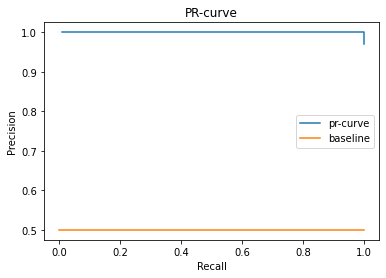

In [67]:
# PR-curve

plt.title("PR-curve")
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.plot(y_conf.loc[:, 'recall'], y_conf.loc[:, 'precision'], label='pr-curve')

# Baseline = P / (P + total)
# baseline보다 pr-curve가 위에 있을 수록 좋은 모델이다.
baseline = n_test / (2* n_test)
baseline = np.array([baseline]*2)
x = np.array(range(0,2))

plt.plot(x, baseline, label = 'baseline')

plt.legend()
plt.show()

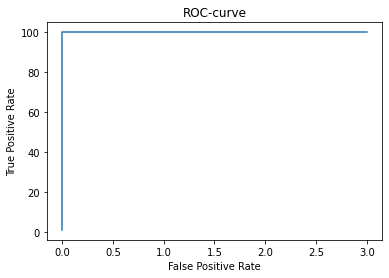

In [71]:
# Receiver Operating Characteristic
plt.plot(y_conf.loc[:, 'cumulated fp'], y_conf.loc[:, 'cumulated tp'])
plt.title("ROC-curve")
plt.xlabel('False Positive Rate') # Specificity
plt.ylabel('True Positive Rate') # Sensitive

# y=x 그래프보다 위에 있을 수록 좋은 모델이다.
#plt.plot(y_conf.loc[:, 'cumulated tp'], y_conf.loc[:, 'cumulated tp'])
plt.show()  